**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

# Get the Data

## Download the Data

In [1]:
# NumPy is for scientific computing with Python. We mainly use this to manipulate matrices.
import numpy as np
# Pandas is a kind of database tool used to load & manipulate data.
import pandas as pd

# Download the data using a .csv file link from -> https://github.com/ageron/handson-ml2
# Follow kaggle dataset -> https://www.kaggle.com/datasets/camnugent/california-housing-prices
link = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(link)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
# Check no of rows & columns in the dataset
print("Shape of the data :", housing.shape)

# See all the columns in the dataset
print("All columns are :", list(housing.columns))

Shape of the data : (20640, 10)
All columns are : ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [3]:
# Check datatypes & count of not-null values in each field
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started. Notice that the `total_bedrooms` attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will need to take care of this later.

All attributes are numerical, except the `ocean_proximity` field. Its type is object, so it could hold any kind of Python object, but since you loaded this data from a CSV file you know that it must be a text attribute.

In [4]:
# value_counts() works on a column & it returns frequency of each class in descending order.
# We mainly use this to count occurances of categorical data or data having few unique values.
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# describe() works on whole DataFrame (pandas dataset object) and prints importent staistical information
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


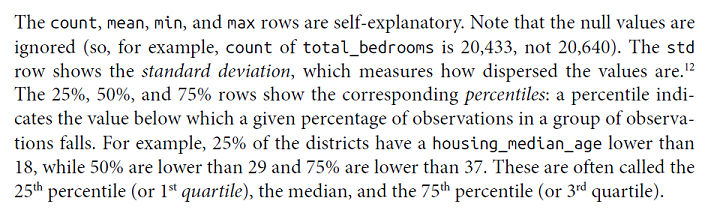

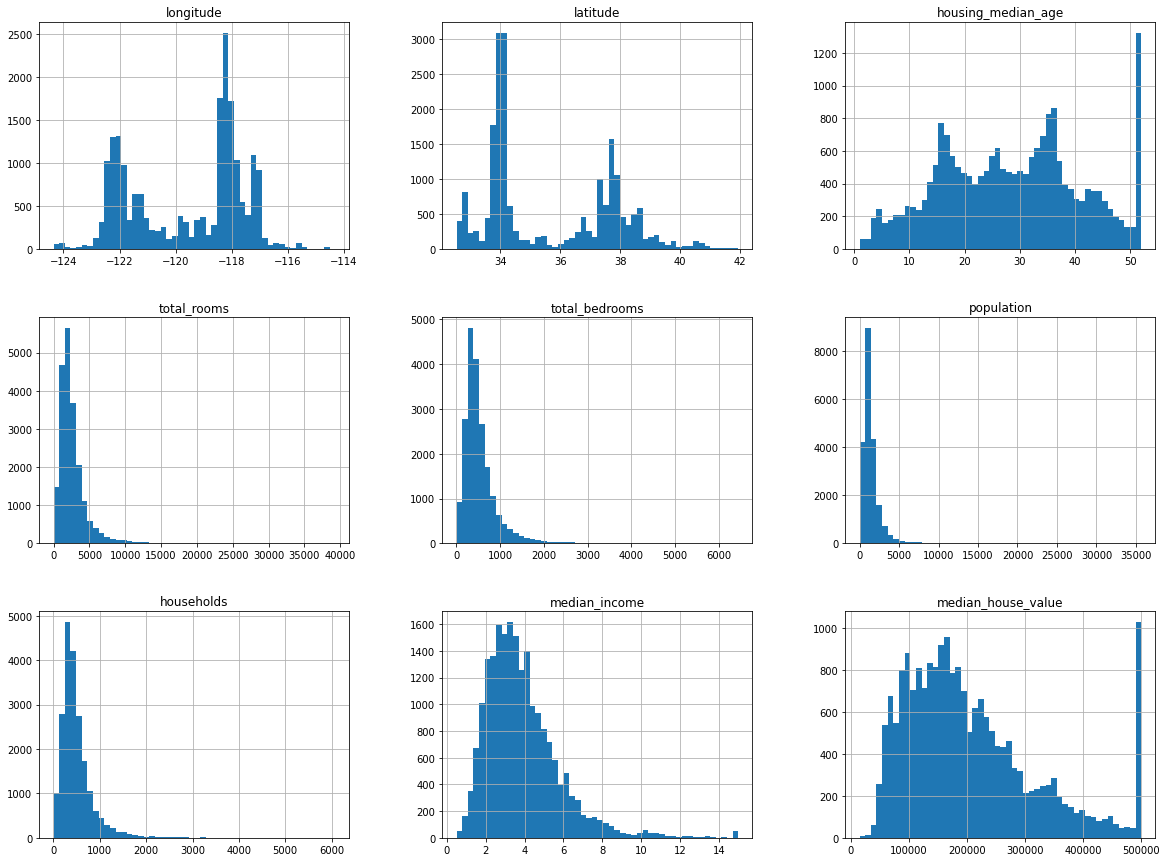

In [6]:
# Matplotlib is a very powerful module containing all kinds of data visualization tools
from matplotlib import pyplot as plt

# DataFrame.hist() creates histogram of every feature present in the DataFrame.
housing.hist(bins=50, figsize=(20,15))
plt.show()

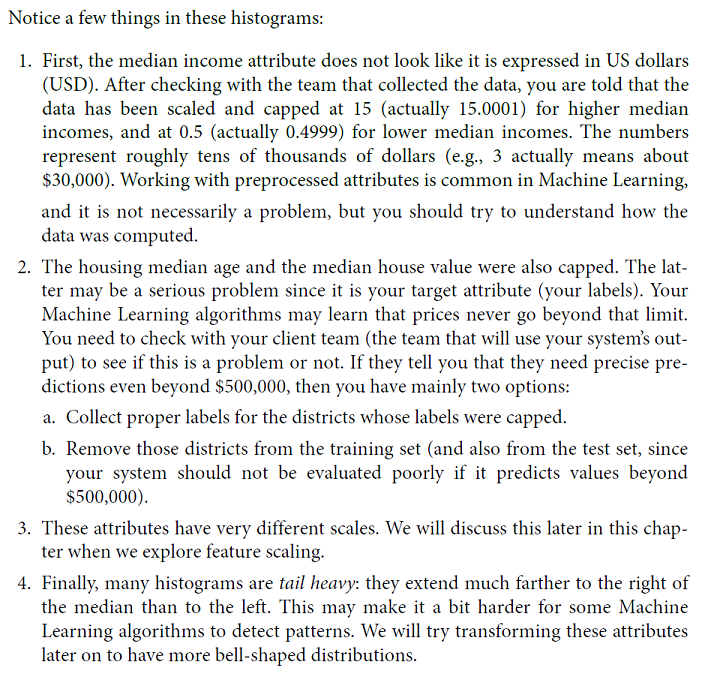

## Create a Test Set

In [7]:
from sklearn.model_selection import train_test_split

# train_test_split is a very common and standard function to split dataset into training & testing set
# Here test_size takes what fraction of dataset should be in test set.
# We can use shuffle=True to set random sample of the test set.
train_set, test_set = train_test_split(housing, test_size=0.2, shuffle=True, random_state=0)

In [8]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,136900.0,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,241300.0,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,200700.0,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,72500.0,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,460000.0,NEAR BAY


In [9]:
print("Size of training data :", train_set.shape)
print("Size of testing data :", test_set.shape)

Size of training data : (16512, 10)
Size of testing data : (4128, 10)


In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


# Discover and Visualize the Data to Gain Insights

## Visualizing Geographical Data

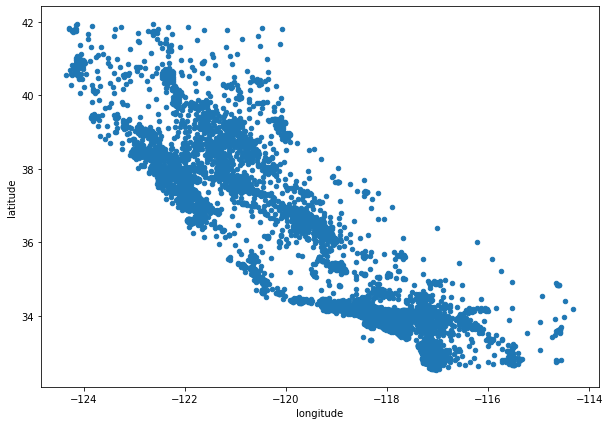

In [11]:
# This plot is called scatter-plot, where we use a dot to represent each instance of the dataset.
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7))
plt.show()

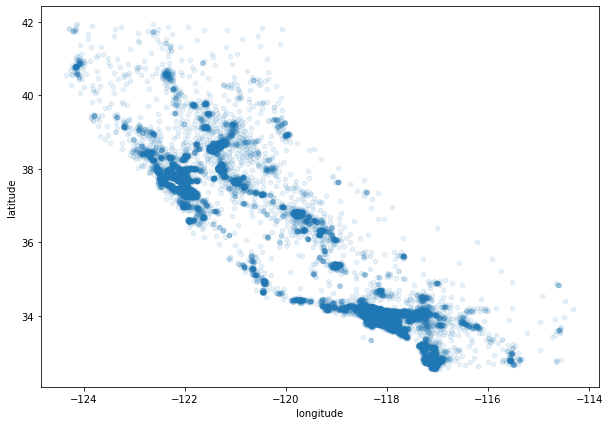

In [12]:
# To check the density of dots, we bring down the opacity of the dots to 0.1
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7), alpha=0.1)
plt.show()

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611 ). Thanks to Wilmer Arellano for pointing it out.

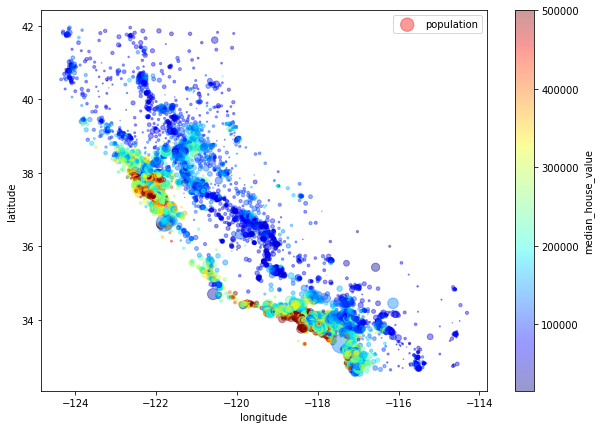

In [13]:
# In this plot, the radious of each circle represents district's population & color represents price

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

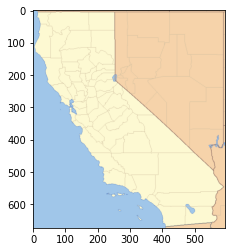

In [14]:
# To make it more understandable, lets overleap this plot on a real image of California state.

# skimage is from the image scikit-image
# To install scikit-image, use the command "pip install scikit-image"
from skimage import io

link = "https://github.com/ageron/handson-ml2/blob/master/images/end_to_end_project/california.png?raw=true"
california_image = io.imread(link)
plt.imshow(california_image)
plt.show()

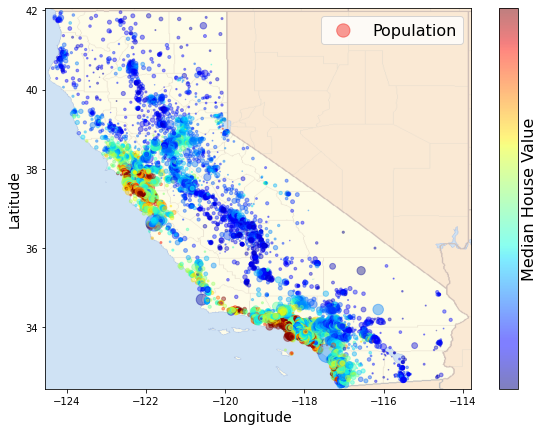

In [15]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_image, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

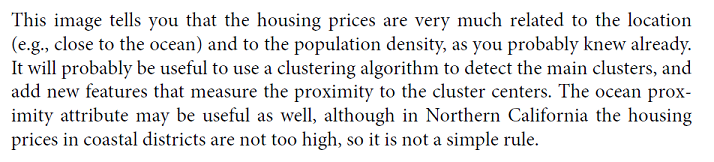

## Looking for Correlations

In [16]:
# Here we are using Pearson correlation coefficient.
# corr() autometically calculates correlation for every pair of attributes
corr_matrix = housing.corr()

In [17]:
# Lets see the most correlated features to "median_house_value"
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

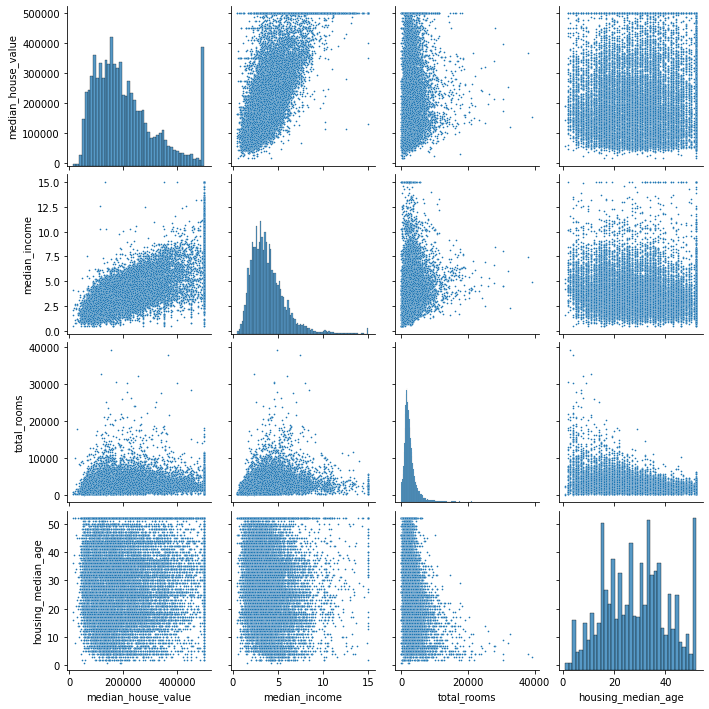

In [18]:
# Just like matplotlib, seaborn is also a data-visualization tool.
# Seaborn works upon matplotlib (seaborn is dependent on matplotlib)
# Seaborn can create some cool looking plots with lesser effort than matplotlib
import seaborn as sns

# pairplot() plots 2D scatterplot for every combinations of pair-wise features
# As we have 10 features, we will end up plotting 100 plots in a 10 x 10 grid.
# So we are plotting only those features having high correlation with "median_house_value"
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

sns.pairplot(housing[attributes], plot_kws={"s": 3})
plt.show()

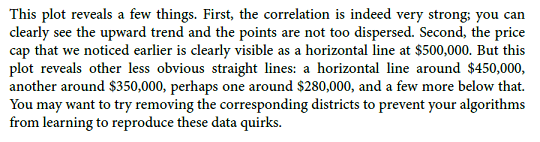

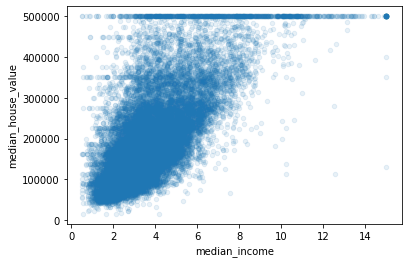

In [19]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

## Experimenting with Attribute Combinations

In [20]:
# Wew can generate more feature by logically combining one or more features
# Like, (rooms in a single household) = (total no of rooms) / (no of households)

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [21]:
# Again calculate correlation for new features.

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

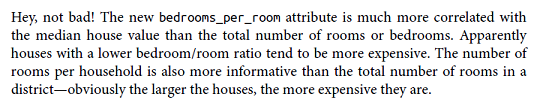

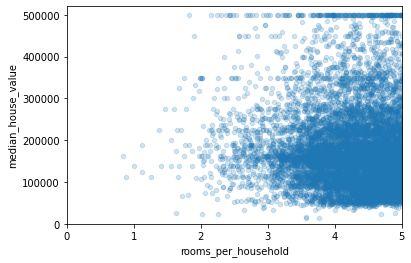

In [22]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [23]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the Data for Machine Learning Algorithms

In [24]:
# As our objective is to predict "median_house_value", we will treat it as label, 
# and this "median_house_value" will not be a part of feature anymore.
# We are seperating the label from features.

housing = train_set.drop("median_house_value", axis=1)   # Training feature
housing_labels = train_set["median_house_value"].copy()  # Training label

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Data Cleaning

In the book 3 options are listed:

```python
# option 1 : Get rid of the corresponding districts
housing.dropna(subset=["total_bedrooms"])

# option 2 : Get rid of the whole attribute.
housing.drop("total_bedrooms", axis=1)

# option 3 : Set the values to some value (zero, the mean, the median, etc.).
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [26]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13933,-117.31,34.25,29.0,4610.0,NaN,1569.0,592.0,2.7663,INLAND
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
2826,-119.11,35.42,52.0,154.0,NaN,37.0,16.0,10.0263,INLAND
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN


In [27]:
# option 1 : Get rid of the corresponding districts
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [28]:
# option 2 : Get rid of the whole attribute.
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
13933,-117.31,34.25,29.0,4610.0,1569.0,592.0,2.7663,INLAND
7668,-118.08,33.92,38.0,1335.0,1011.0,269.0,3.6908,<1H OCEAN
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
2826,-119.11,35.42,52.0,154.0,37.0,16.0,10.0263,INLAND
20372,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN


In [29]:
# option 3 : Set the values to some value (zero, the mean, the median, etc.).
# Here we are first calculating median of rest of values in training set.
# Then replace the null values with median using fillna() function
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13933,-117.31,34.25,29.0,4610.0,434.0,1569.0,592.0,2.7663,INLAND
7668,-118.08,33.92,38.0,1335.0,434.0,1011.0,269.0,3.6908,<1H OCEAN
1606,-122.08,37.88,26.0,2947.0,434.0,825.0,626.0,2.9330,NEAR BAY
2826,-119.11,35.42,52.0,154.0,434.0,37.0,16.0,10.0263,INLAND
20372,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN


## Handling Text and Categorical Attributes

Machine Learning models prefer to work only with numeric values. Now, in our dataset, `ocean_proximity` is a non-neumeric value, so first convert it into a neumeric value so that the ML model can utilize it while training. We seen earlier, `ocean_proximity` is a very useful feature in our dataset.

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [30]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12069,INLAND
15925,NEAR BAY
11162,<1H OCEAN
4904,<1H OCEAN
4683,<1H OCEAN
10796,<1H OCEAN
8839,<1H OCEAN
9033,NEAR OCEAN
12439,INLAND
3094,INLAND


In [31]:
# Our goal is to map the categorical values into some neumeric values.
# We can do this manually, but sklearn.preprocessing contains a simple function
# "OrdinalEncoder", which does the job for us.

from sklearn.preprocessing import OrdinalEncoder

# First create an object of "OrdinalEncoder" class
ordinal_encoder = OrdinalEncoder()
# Pass the data we want to convert into "fit_transform()" function
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# Lets see the result
housing_cat_encoded[:10]

array([[1.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [1.],
       [1.]])

In [32]:
# Here we can see in which order it has replaced the values,
# Here the values will be replaces by its index.

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

We can interprate the output as

```
'<1H OCEAN'  -> 0
'INLAND'     -> 1
'ISLAND'     -> 2
'NEAR BAY'   -> 3
'NEAR OCEAN' -> 4
```

One problem with converting categorical values into neumerical value is, we are randomly assigning one unique number to each class or category, the number might be any number or in a sequential manner as "A" -> 1, "B" -> 2... But the ML model will interprete as numeric value and it will think higher value means good and lower value means bad, but it doesn't know that the higher value or lower value have nothing to do with actual categorical information.

To eliminate this biasing effect, after applying "OrdinalEncoding", we use a technique called "OneHotEncoding". What it does is, it converts each unique number into a vector of size `n`. Now,. at a time, only one of the values will be set to `1`, and all others will be = `0`. As only one value is active at a time, thats why it is calles one hot encoding. This technique eliminates the boasing effect.

In [33]:
# Sklearn.preprocessing also contains "OneHotEncoder", which simply converts numeric values into one hot vector.
from sklearn.preprocessing import OneHotEncoder

# First create "OneHotEncoder" object
cat_encoder = OneHotEncoder(sparse=False)
# Pass the feature we want to convert into the "fit_transform" function
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [34]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Transformations

In [35]:
# Fill NULL values with median
median = housing["total_bedrooms"].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [36]:
# Add additional features
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,INLAND,7.723077,0.151394,3.507692
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,NEAR BAY,5.326622,0.206636,3.322148
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,<1H OCEAN,4.668478,0.224098,2.777174
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,<1H OCEAN,3.383495,0.298422,3.635922
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,<1H OCEAN,4.119792,0.253266,1.970486


In [37]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
# We can directly create One hot vector without preprocessing with OrdinalEncoder
housing_cat_hot = cat_encoder.fit_transform(housing_cat)
housing_cat_hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [38]:
housing.drop(["ocean_proximity"], axis=1, inplace=True)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,7.723077,0.151394,3.507692
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,5.326622,0.206636,3.322148
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,4.668478,0.224098,2.777174
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,3.383495,0.298422,3.635922
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,4.119792,0.253266,1.970486
...,...,...,...,...,...,...,...,...,...,...,...
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,6.000000,0.174277,3.251142
19648,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,5.349282,0.174419,3.095694
9845,-121.90,36.58,31.0,1431.0,434.0,704.0,393.0,3.1977,3.641221,0.303284,1.791349
10799,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,4.540598,0.234353,2.247863


In [39]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
housing_scaled = sc.fit_transform(housing)

In [40]:
housing_scaled

array([[ 1.00389865, -0.8400624 , -1.79507596, ...,  0.90771428,
        -0.97458529,  0.07408222],
       [-1.43477229,  0.98536392,  1.85553889, ..., -0.04200187,
        -0.10414183,  0.04527606],
       [ 0.77948108, -0.8400624 , -0.20785212, ..., -0.30282448,
         0.17100692, -0.03933216],
       ...,
       [-1.1654712 ,  0.44709718,  0.18895385, ..., -0.70992683,
         1.41875637, -0.19238342],
       [ 0.81439048, -0.93835459,  0.42703742, ..., -0.35350337,
         0.33259811, -0.12150865],
       [ 1.99632302, -1.32216217, -1.08082523, ..., -0.59566992,
         1.05347686,  0.06298936]])

In [41]:
housing_prepared = np.concatenate((housing_scaled, housing_cat_hot), axis=1)
housing_prepared

array([[ 1.00389865, -0.8400624 , -1.79507596, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43477229,  0.98536392,  1.85553889, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77948108, -0.8400624 , -0.20785212, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.1654712 ,  0.44709718,  0.18895385, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.81439048, -0.93835459,  0.42703742, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.99632302, -1.32216217, -1.08082523, ...,  0.        ,
         0.        ,  0.        ]])

In [42]:
housing_prepared.shape

(16512, 16)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Compare against the actual values:

In [ ]:
print("Labels:", list(some_labels))

In [ ]:
some_data_prepared

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

**Note**: since Scikit-Learn 0.22, you can get the RMSE directly by calling the `mean_squared_error()` function with `squared=False`.

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

## Better Evaluation Using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

# Fine-Tune Your Model

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

## Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

## Analyze the Best Models and Their Errors

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

## Evaluate Your System on the Test Set

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

We could compute the interval manually like this:

In [ ]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

Alternatively, we could use a z-scores rather than t-scores:

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

## Model persistence using joblib

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF